# Explore and Model

### Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from yellowbrick.classifier import DiscriminationThreshold, roc_auc


np.random.seed(0)


%matplotlib inline


### Load Data

In [2]:
# setting to view all columns
pd.set_option('display.max_columns', 999)

# opening saved data from .csv file
df_2 = pd.read_csv('data/file2.csv',
                   index_col=0)

display(df_2.shape)
df_2.head()

(39644, 61)

,timedelta,n_title,n_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,nhrefs,nself_hrefs,nimgs,nvideos,avg_token_length,nkeywords,channel_lifestyle,channel_ent,channel_bus,channel_socmed,channel_tech,channel_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_ref_min_shares,self_ref_max_shares,self_ref_avg_shares,week_mon,week_tues,week_wednes,week_thurs,week_fri,week_satur,week_sun,weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subj,global_sentiment_pol,global_rate_pos_words,global_rate_neg_words,rate_pos_words,rate_neg_words,avg_pos_pol,min_pos_pol,max_pos_pol,avg_neg_pol,min_neg_pol,max_neg_pol,title_subj,title_sentiment_pol,abs_title_subj,abs_title_sentiment_pol,shares,Shares_plus
url,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
http://mashable.com/2013/01/07/amazon-instant-video-browser/,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
http://mashable.com/2013/01/07/ap-samsung-sponsored-tweets/,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
http://mashable.com/2013/01/07/apple-40-billion-app-downloads/,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
http://mashable.com/2013/01/07/astronaut-notre-dame-bcs/,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


> __To proceed__:
* Visualize data
* To scale or not to scale
* Build a Decision Tree classifier, to set a modeling baseline
* Examine the relative importance of dataset features
* Test, tune, and score ensemble method models against the dataset
* Select best features for final modeling

### Plot Class Counts

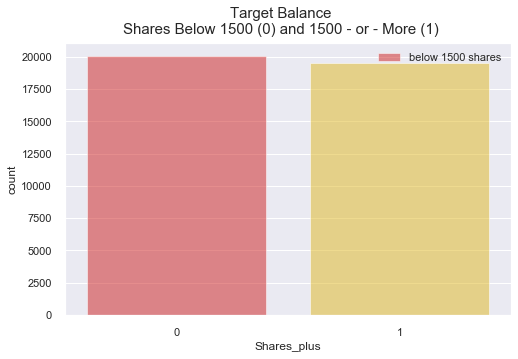

In [3]:
# styling the figure
sns.set(style="darkgrid")
plt.figure(figsize=(8, 5))

# titling and labeling
plt.suptitle(
    "Target Balance\nShares Below 1500 (0) and 1500 - or - More (1)",
    fontsize=15)
plt.ylabel("count")

# plotting
ax = sns.countplot(x="Shares_plus", alpha=.5, palette="hot", data=df_2)

# adding legend
plt.legend(labels=('below 1500 shares', '1500 and above'))
plt.savefig('images/target-balance.png', transparent=False)

plt.show()

> # __Q:__ What are the headlines and apparent subject matter of the most and least shared articles in the dataset?
* __Is there an apparent difference?__
* __Is machine learning necessary, for this business problem?__

In [4]:
# viewing most and least shared articles
pd.set_option('min_rows', 20)
df_2.shares.sort_values(ascending=False)

url
http://mashable.com/2013/07/03/low-cost-iphone/                                    843300
http://mashable.com/2013/04/15/dove-ad-beauty-sketches/                            690400
http://mashable.com/2014/04/09/first-100-gilt-soundcloud-stitchfix/                663600
http://mashable.com/2013/11/18/kanye-west-harvard-lecture/                         652900
http://mashable.com/2013/03/02/wealth-inequality/                                  617900
http://mashable.com/2013/11/12/roomba-880-review/                                  441000
http://mashable.com/2014/01/14/australia-heatwave-photos/                          310800
http://mashable.com/2013/03/28/blackberry-1-million/                               306100
http://mashable.com/2013/11/14/ibm-watson-brief/                                   298400
http://mashable.com/2014/10/22/ebola-cdc-active-monitoring/                        284700
                                                                                    ...  
http:/

> __We can easily perceive the need for machine learning, in this case__.
* Articles at both ends of the scale deal with a mixture of technology, entertainment, and popular culture.
* It makes sense to delve deeper for insight, as classifying characteristics are not readily distinguishable.
* As we noted earlier, there are no obvious, strong correlations between any of the features and the original `shares` target.
* With nearly 40K records, it also makes sense to automate the task.

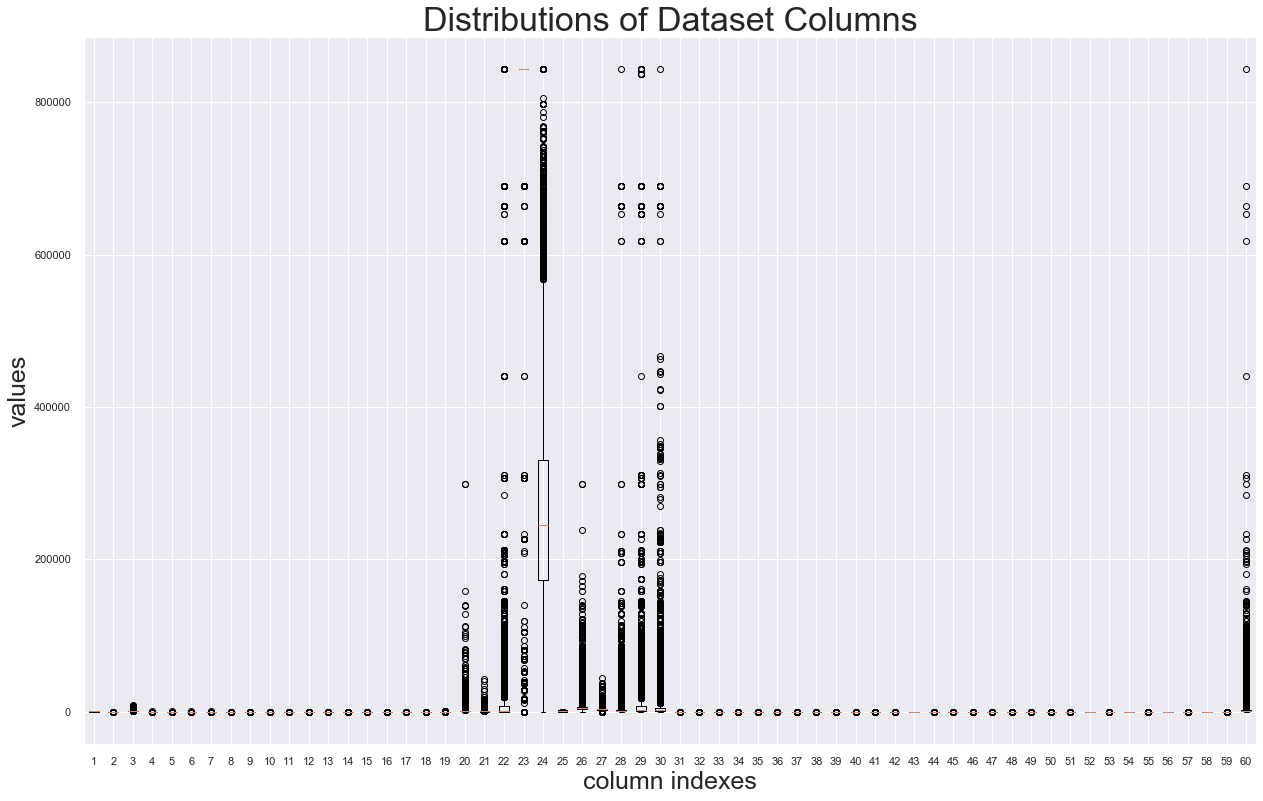

In [5]:
# viewing column box plots
plt.figure(figsize=(21, 13))
plt.boxplot([df_2[col] for col in df_2.iloc[:, 0:60].columns])

plt.title("Distributions of Dataset Columns",
          fontdict={'fontsize': 34})
plt.xlabel('column indexes', fontsize=25)
plt.ylabel('values', fontsize=25)

plt.savefig('images/dataset-box-plots.png', transparent=False)

plt.show()

> We see a significant range in scale for data in this set; however, scaling is not required for Decision Tree models, which is what we will be using to set a modeling baseline.

## Manual Tuning
* ## Build a Base Model

#### Split Predictor Variables and Target

In [6]:
# spliting the dataframe outcome and predictor variables
X = df_2.drop(['shares', 'Shares_plus'], axis=1)  # features
y = df_2['Shares_plus']  # target

# splitting the dataset into 75/25 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0
                                                    )

### Unfit Model

#### ROC - AUC
> Let's plot the receiver operating characteristic (ROC) probability curve and the area underneath the curve (AUC) representing the degree of separability for target classes in an unfitted Logistic Regression model.

In [7]:
warnings.filterwarnings("ignore")


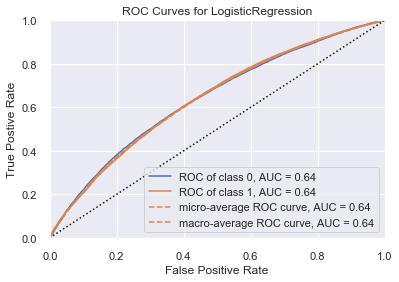

In [8]:
visualizer = roc_auc(LogisticRegression(), X, y)

> Near perfect predictions would display the curves' elbows in the top - left corner of the plot.
* Our predictive capability is far from perfect, but it does give us an edge in our ability to determine, in advance, characteristics for an article to perform above the 50th - percentile for article shares (1400) and above our target (1500).
* Next, we can use a Decision Tree classifier to build model for predicting our target classes.

### Buid a Decision Tree

using the `gini` impurity criterion, which is well suited to binary classification, with a `max_depth` of 5 and a random state of 0

In [9]:
# instantiate and fit a Decision Tree classifier
tree_clf = DecisionTreeClassifier(criterion='gini',
                                  max_depth=5,
                                  random_state=0)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

#### Model Performance

Along with a scikit-learn classification report, we will view a matrix and heatmap reflecting outcomes for our model, in the following format:

<table>
  <tr>
    <td>True Negative</td>
    <td>False Positive</td>
  </tr>
  <tr>
    <td>False Negative</td>
    <td>True Positive</td>
  </tr>
</table>

> Given the need, we would likely want to favor False Negatives over False Positives.
* False Positives would incorrectly predict high - performing content, potentially causing the content provider to over - charge advertisers and under - deliver content views.
* False Negatives could result in over - delivering for advertisers. This may lessen charges for individual advertisements, but could enhance reputation, favor advertiser ROI, and encourage repeat business.
* In any case, since this is a fairly balanced set of classes, the more accurate the model, the better, to deliver or exceed the expectations of advertising algorithms.

In [10]:
# viewing test set predictions
pred = tree_clf.predict(X_test)

# viewing confusion matrix and classification report
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))


 [[3237 1836]
 [1795 3043]] 

              precision    recall  f1-score   support

           0       0.64      0.64      0.64      5073
           1       0.62      0.63      0.63      4838

    accuracy                           0.63      9911
   macro avg       0.63      0.63      0.63      9911
weighted avg       0.63      0.63      0.63      9911



> Scores appear consistent accross the board, for this model, with equivalent precision, recall, and f1-scores all between 0.62 and 0.64, inclusive.
* That's better than a 50\/50 guess as to what content is likely to be shared.
* The model indicates that our True predictions are correct ~2\/3 of the time (positive or negative).

> __Accuracy__, quite simply, is a ratio of how many predictions were correct. It is useful when values of false positives and false negatives are close.
* The __Precision__ ratio indicates the proportion of predicted positive observations that were correct. The metric relates to a low false positive rate, so it could be useful for this case.
* __Recall__, or Sensitivity lets us know our model's ratio of correctly predicted positive observations from all truly positive observationss.
* __F1__ score takes both false positives and false negatives into account and reports a weighted average of the two. When the cost of false positives and false negatives are very different, F1 is a more useful metric than accuracy.

#### Confusion Matrix Heatmap

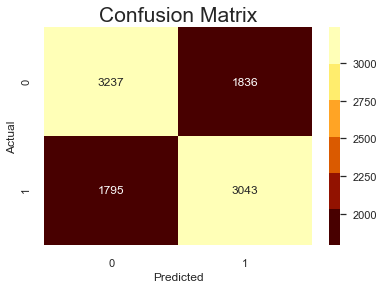

In [11]:
# plotting confusion matrix heatmap
cm = confusion_matrix(y_test, pred)

sns.heatmap(cm, cmap=sns.color_palette('afmhot'), annot=True, fmt='0.4g')

plt.autoscale()

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix", fontdict={'fontsize': 21})

plt.savefig('images/dtree-cm-heatmap.png', transparent=False)

plt.show()

<table>
  <tr>
    <td>True Negative: </td>
    <td>False Positive: </td>
  </tr>
  <tr>
    <td>False Negative: </td>
    <td>True Positive: </td>
  </tr>
</table>

> The heatmap shows that the model slightly favors false negatives over false positives (1836 to 1795), but is still close enough for accuracy to be a relevant metric.

> While computational expense is low, for a simple decision tree model, it does present a danger of bias.
* The algorithm splits in favor of the strongest predictor at any particular leaf. As a result, class predictions can be heavily influenced by only a few strong predictors.
* We will want to try additional models, to see whether more robust options may improve our scores for accuracy and/or precision.

#### Feature Importance

Determine which features impact most significantly the outcome, for our Decision Tree model.

In [12]:
# checking feature importances of the trained model
tree_clf.feature_importances_

array([0.06668088, 0.        , 0.        , 0.03397857, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00576391, 0.10550961, 0.        ,
       0.07508385, 0.09589684, 0.01117742, 0.        , 0.        ,
       0.00409296, 0.        , 0.        , 0.        , 0.        ,
       0.01493452, 0.3258526 , 0.11303927, 0.        , 0.00380801,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.09888608, 0.00688671, 0.00954792,
       0.01868913, 0.        , 0.        , 0.        , 0.        ,
       0.00324808, 0.        , 0.00232904, 0.        , 0.00270122,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00189338])

#### Plot Feature Importances

Let's get a more useful view, by displaying feature importances with column names on a horizontal bar plot.

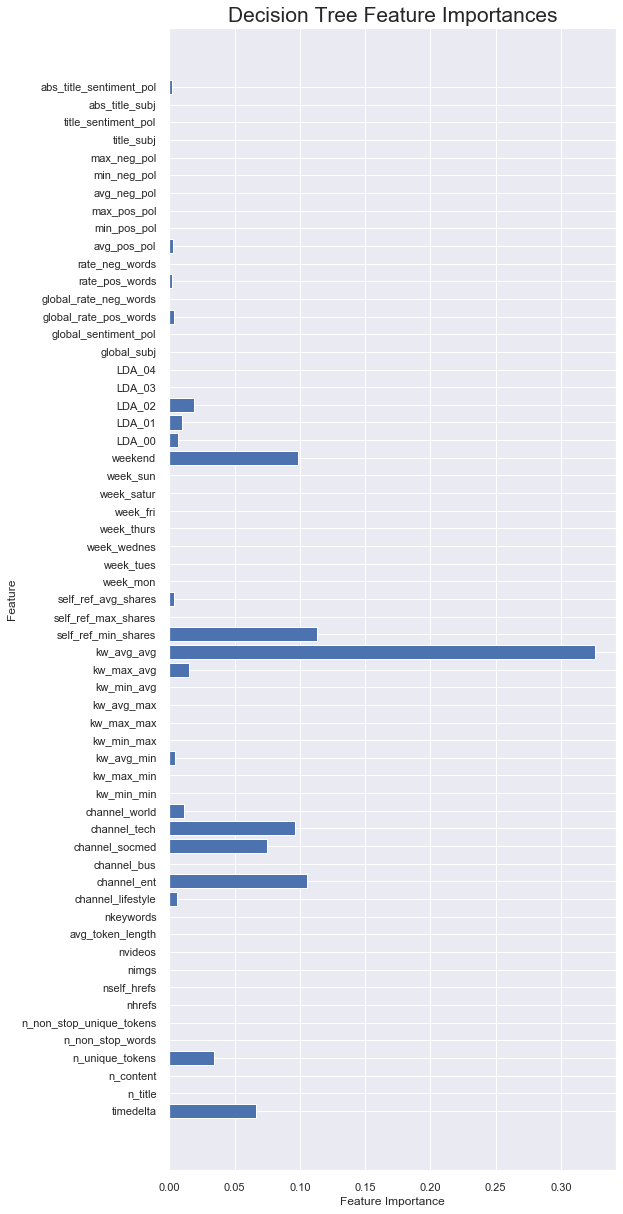

In [13]:
# visualizing Decision Tree feature importances
def plot_feature_importances(model, heading):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8, 21))
    plt.title(heading, fontdict={'fontsize': 21})
    plt.barh(range(n_features),
             model.feature_importances_,
             align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')


plot_feature_importances(tree_clf, "Decision Tree Feature Importances")

> Most of the features do not seem to male a whole lot of difference.
* The plot suggests 7 - to - 10 at least moderately important features, among more than 50 in the dataset.
* Let's check scores for our full - featured tree model and do a couple of comparisons, before reducing the number of predictors.

# __Q:__ Why look further?

> We have identified what appear to be our strongest predictors. Couldn't we just stop here?
* Revenue generated from online content relies on views and user interactions.
    - When content is shared widely, more consumers are likely to have opportunities to view it.
    - Consequently, any advertisments served along with the content has greater exposure.
    - Since online advertising algorithms favor relevant content, __providers of web pages with highly shared content can expect to enjoy revenue from higher advertising rates__.
* The difference in earnings per view is often only a few cents. Those cents add up when we are talking about thousands of views and multiple ad placements per article page.
    - For this reason, it is reasonable to look further.
    - __A model increases our ability to predict shareable content by even just a couple of percentage points could be well worth the effort__.
* In addition, shared content suggest that providers are effectively targeting their key marketing personas with relevant content. That is valuable for brand reputation, __suggests satisfactory user experience__, and encourages repeat visits.

#### About Bootstrap Aggregation (Bagging) Models

> A bagged trees ensemble model can help reduce variance that may be present in a simple Decision Tree model.
* The model uses decision trees from subsets of the data and averages the 'votes'
* It can take in an existing tree model as a parameter.

> We can pass on testing with this ensemble method, in favor of a superior algorithm.

#### About Random Forest Models
> Random Forest is a supervised learning agorithm that performs random sampling with replacement, to essentially fit multiple decision trees.
* This model allows for lower correlation between samples than bagging, by limiting the number of features on which to split.
* Since Random Forest leaves out a different segment of the data for testing each tree, it removes bias that can affect single Decision Tree models. Accordingly, for Random Forest models, separate cross validation is not required.
    * We will scale our data and see how a Random Forest model scores in comparison to our previous models.

## GridSearchCV Random Forest Pipeline

> Modeling with different algorithms is one way to improve our ability to predict outcomes from data features.
    - We can also fine tune model hyperparameters.
    - It can be time - prohibitive to perform manual tuning for multiple hyper - perameters.
* We can create a parameter grid dictionary listing a range of values we wish to tune for optimization of our Random Forest model.
* Values we will include:
    - the estimator to use, in this case:
        * a pipeline to scale the data
        * a Random Forest classifier to build a model
    - maximum depth
    - minimum samples to split
    - minimum samples per leaf

In [14]:
# building a Random Forest classifier pipeline
rf_pipeline = Pipeline([('ss', StandardScaler()),
                        ('RF', RandomForestClassifier(random_state=0))])

# defining the grid
grid = [{'RF__max_depth': [2, 4, 6],
         'RF__min_samples_split': [2, 5, 10],
         'RF__min_samples_leaf': [1, 3, 5]}]

# defining a grid search with the estimator
# using `refit`, to update the model with optimized hyperparameters
rf_gridsearch = GridSearchCV(estimator=rf_pipeline,
                             param_grid=grid,
                             scoring='accuracy',
                             cv=5,
                             refit=True,
                             n_jobs=-1,
                             verbose=1)

# fitting the training data
rf_gridsearch.fit(X_train, y_train)

# viewing accuracy on the test set
pred = rf_gridsearch.predict(X_test)
print(f"Optimal Parameters: {rf_gridsearch.best_params_}")
print("")
print("rf_gridsearch score: ",
      rf_gridsearch.score(X_test, y_test).round(2))
print("")
print(classification_report(y_test, pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   10.8s finished


Optimal Parameters: {'RF__max_depth': 6, 'RF__min_samples_leaf': 5, 'RF__min_samples_split': 2}

rf_gridsearch score:  0.65

              precision    recall  f1-score   support

           0       0.66      0.64      0.65      5073
           1       0.64      0.66      0.65      4838

    accuracy                           0.65      9911
   macro avg       0.65      0.65      0.65      9911
weighted avg       0.65      0.65      0.65      9911



> We see a two - percent increase in precision and accuracy, as a result of using GridSearchCV to find optimal parameters for tuning a Random Forest model, based on the values in our parameter grid.

# __Q:__ Is feature importance affected by model tuning?

> Are the most important features empirically important, or is their importance relative to the algorithm in use?

### Random Forest Feature Importance

In [15]:
# instantiate a variable for the optimized Random Forest model
rf_model = rf_gridsearch.best_estimator_.steps[1][1]

# viewing the full model and hyperperameters
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

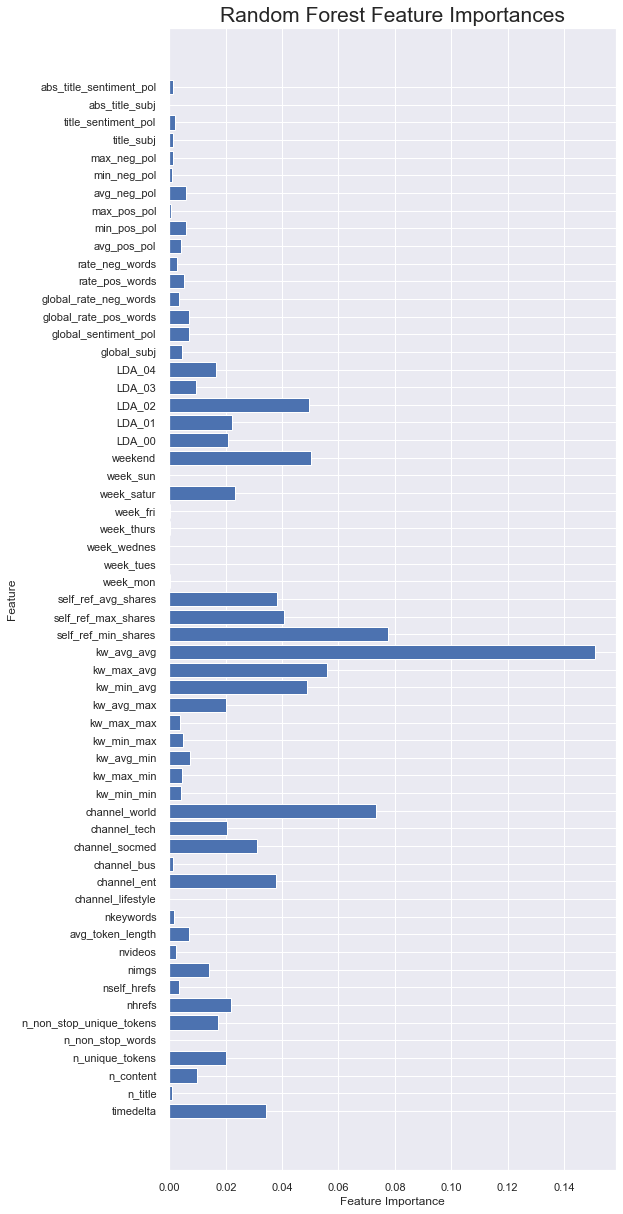

In [16]:
# visualizing Random Forest feature importances
plot_feature_importances(rf_model, "Random Forest Feature Importances")

> While scores have remained close among our models, we can observe from the plot above that feature __importances have shifted__.
* The random forest classifier suggests 10-or-so relatively important features--a few more than suggested by the Decision Tree model.
* Where `kw_avg_avg` reached 0.33 and `channel_world` eeked - out .01 on the scale, for our Tree model, the Random Forest model improtances for the same two features are approximately 0.15 and .07, respectively.

Even if scores were exactly the same, the more balanced RandomForest model would be preferred to the lucky - guess of our original Decision Tree model.

### Forward Selection

> So far, we have been modeling with all features in the dataframe.
* Including irrelevant features can introduce 'noise' to our model and make results less interpretable.
* We can make use of the `mlxtend` library's `SequentialFeatureSelector` module to perform forward selection and determine the best features to retain for modeling.
* The module also enables us to take advantage of machine learning to select the best number of best features, by entering for the `k_features` hyperperameter a tuple indicating the range within which to solve.

In [17]:
# pipeline using step forward feature selection for 8-12 features
sfs1 = sfs(estimator=rf_model,
           n_jobs=-1,  # using all CPUs
           k_features=(8, 13),
           forward=True,
           floating=False,
           verbose=1,
           scoring='accuracy',
           cv=5)

pipe = make_pipeline(StandardScaler(), sfs1)

pipe.fit(X_train, y_train)

print('best combination (ACC: %.3f): %s\n' % (
    round(sfs1.k_score_, 5), sfs1.k_feature_idx_))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  59 out of  59 | elapsed:    5.0s finished
Features: 1/13[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  58 out of  58 | elapsed:    8.0s finished
Features: 2/13[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  57 out of  57 | elapsed:    7.0s finished
Features: 3/13[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  56 out of  56 | elapsed:    7.4s finished
Features: 4/13[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done

best combination (ACC: 0.655): (0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41)



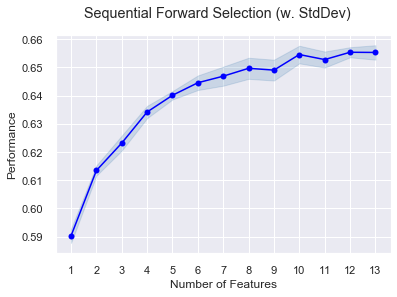

In [18]:
# visualize selection performance
plot_sfs(sfs1.get_metric_dict(), kind='std_err')
plt.suptitle('Sequential Forward Selection (w. StdDev)',
             fontdict={'fontsize': 34,
                       'verticalalignment': 'top'})
plt.savefig('images/n-features.png', transparent=False)

> So:
* The score for the 12 selected features is slightly better than the all - features model.
* We can use our selected featues to create a slimmer `X` for training and testing.
* This will provide us with a much simpler set of relevant variables for modeling.

### Select Feature Subsets

In [19]:
# view the selected feature subsets as a dataframe
# the dataframe uses the number of features as column labels
# the `feature_names` index (3) holds selected column indexes
# as tuples
sub_feats_df = pd.DataFrame.from_dict(sfs1.subsets_)
print('all subsets:\n')
sub_feats_df

all subsets:



,1,2,3,4,5,6,7,8,9,10,11,12,13
feature_idx,"(26,)","(13, 26)","(13, 26, 37)","(13, 26, 37, 40)","(13, 26, 29, 37, 40)","(0, 13, 26, 29, 37, 40)","(0, 3, 13, 26, 29, 37, 40)","(0, 3, 13, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 16, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 16, 26, 27, 29, 37, 40, 41)","(0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41)","(0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41, 49)"
cv_scores,"[0.5942492012779552, 0.5881957289389608, 0.590...","[0.6125777703043551, 0.6176223305868506, 0.612...","[0.6228350428787623, 0.6253573230200101, 0.621...","[0.6320834033966706, 0.6341012275096687, 0.630...","[0.6403228518580797, 0.644358500084076, 0.6351...","[0.6406591558769127, 0.6480578442912392, 0.638...","[0.6428451319993274, 0.6497393643854044, 0.639...","[0.6473852362535732, 0.6541113166302337, 0.640...","[0.6473852362535732, 0.6549520766773163, 0.640...","[0.6463763241970741, 0.658483268875063, 0.6500...","[0.6500756684042375, 0.6483941483100724, 0.655...","[0.6520934925172356, 0.6613418530351438, 0.652...","[0.6478896922818228, 0.6536068606019841, 0.657..."
avg_score,0.590321,0.61346,0.62318,0.634178,0.640097,0.644537,0.646858,0.649649,0.64901,0.654526,0.652743,0.655333,0.655266
feature_names,"(26,)","(13, 26)","(13, 26, 37)","(13, 26, 37, 40)","(13, 26, 29, 37, 40)","(0, 13, 26, 29, 37, 40)","(0, 3, 13, 26, 29, 37, 40)","(0, 3, 13, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 16, 26, 29, 37, 40, 41)","(0, 3, 13, 15, 16, 26, 27, 29, 37, 40, 41)","(0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41)","(0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41, 49)"


# __Q:__ Why did the score drop between steps 10 and 11, only to reach new heights at step 12?

> Feature 27 (`self_ref_min_shares`) was added, at fold 11, where the model's score dropped. However, the next fold revealed feature 4 (`n_unique_tokens`), which enhanced the model's score above where it had been prior to adding feature 27.

> We can access and extract relevant feature column names with built - in pandas dataframe indexers, or by listing them, as follows:

In [20]:
# listiing column indexes of the selected predictors
sub_feats = list(sfs1.k_feature_idx_)  # instantiate as a list

# viewing forward selected column indexes
print(sub_feats)

# viewing `sub_feats` names, transposed as a series
df_2.iloc[:, sub_feats].head(0).T

[0, 3, 4, 13, 15, 16, 26, 27, 29, 37, 40, 41]


url
timedelta
n_unique_tokens
n_non_stop_words
channel_ent
channel_socmed
channel_tech
kw_avg_avg
self_ref_min_shares
self_ref_avg_shares
weekend


### Update X

In [21]:
# instantiating a variable for the subselected, best features
mod_X = df_2.iloc[:, sub_feats]

# feature selected dataframe with target
mod_df = pd.concat([mod_X, y], axis=1)

# viewing info for columns, shape, and dtypes
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39644 entries, http://mashable.com/2013/01/07/amazon-instant-video-browser/ to http://mashable.com/2014/12/27/youtube-channels-2015/
Data columns (total 13 columns):
timedelta              39644 non-null float64
n_unique_tokens        39644 non-null float64
n_non_stop_words       39644 non-null float64
channel_ent            39644 non-null float64
channel_socmed         39644 non-null float64
channel_tech           39644 non-null float64
kw_avg_avg             39644 non-null float64
self_ref_min_shares    39644 non-null float64
self_ref_avg_shares    39644 non-null float64
weekend                39644 non-null float64
LDA_02                 39644 non-null float64
LDA_03                 39644 non-null float64
Shares_plus            39644 non-null int64
dtypes: float64(12), int64(1)
memory usage: 5.5+ MB


### Correlations Matrix

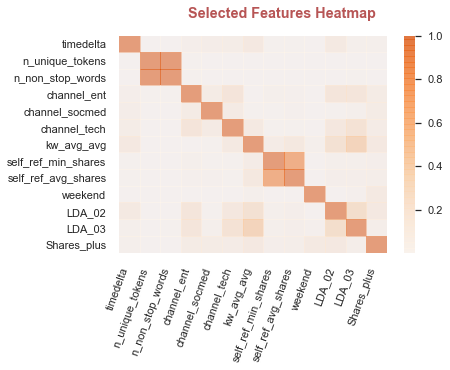

In [23]:
# calculate the correlation matrix
corr = mod_df.corr()

# plot the heatmap
# plt.autoscale = True
feat_heat = sns.heatmap(corr.abs(),
                        center=0.7,
                        cmap="Oranges", alpha=.5,
                        xticklabels=corr.columns,
                        yticklabels=corr.columns
                        )

feat_heat.set_xticklabels(
    feat_heat.get_xticklabels(),
    rotation=70,
    horizontalalignment='right',
    fontweight='light'
)

feat_heat

plt.suptitle("Selected Features Heatmap\n\n", 
             fontweight='bold', 
             color='brown', 
             alpha=0.8)

# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values

plt.savefig('images/sel-feats-heatmap.png',
            transparent=False, pad_inches=.5)

plt.show()

# __Q:__ Is correlation between predictors a problem for classification?

* There appears to be relatively strong correlation between the features `n_unique_tokens` and `n_on_stop_words`, and between `self_ref_min_shares` and `self_ref_avg_shares` predictors.
* Since this is a classification project, and since including thesee features may be necessary to reveal others in tree based models (as noted in the previous question), I am not concerned with their inclusion.

> In addition to the models we have tested, __boosting__ models offer additional tuning options.
* Some boosting models apply more of a brute force approach to determining featue importance, exhaustively testing each predictor.
* Since we have greatly reduced the number of features selected for our modeling dataset, this should not be too painful.

## XG Boost Gridsearch Pipeline

In [24]:
# spliting the dataframe outcome and predictor variables
X = mod_X  # selected important features
y = y  # target remains the same

# splitting the updated dataset into 75/25 training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=0
                                                    )


# building a pipeline with a scaler and a classifier
xgb_pipeline = Pipeline([('ss', StandardScaler()),
                         ('xgb', XGBClassifier(random_state=0))])


# defining the grid
grid = [{
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]}]


# instantiating grid search
xgb_gridsearch = GridSearchCV(
    estimator=XGBClassifier(learning_rate=0.1,
                            n_estimators=100,
                            verbosity=1,
                            objective='binary:logistic',
                            verbose_eval=125,
                            early_stopping_rounds=500,
                            scale_pos_weight=1,
                            seed=0),
    param_grid=grid,
    scoring='accuracy',
    n_jobs=-1,
    iid=False,
    cv=5,
    verbose=3)


# fitting the training data
xgb_gridsearch.fit(X_train, y_train)


# viewing accuracy on the test set
pred = xgb_gridsearch.predict(X_test)


# xgb_gridsearch.best_estimator_

print(f"Optimal Parameters: {xgb_gridsearch.best_params_}\n")
print("xgb_gridsearch score: ", xgb_gridsearch.score(X_test,
                                                     y_test).round(2))
print("\n", confusion_matrix(y_test, pred), "\n")
print(classification_report(y_test, pred))

Fitting 5 folds for each of 405 candidates, totalling 2025 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 488 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 776 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 1544 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 2025 out of 2025 | elapsed:  9.7min finished


Optimal Parameters: {'colsample_bytree': 1.0, 'gamma': 2, 'max_depth': 4, 'min_child_weight': 1, 'subsample': 1.0}

xgb_gridsearch score:  0.66

 [[3367 1706]
 [1673 3165]] 

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      5073
           1       0.65      0.65      0.65      4838

    accuracy                           0.66      9911
   macro avg       0.66      0.66      0.66      9911
weighted avg       0.66      0.66      0.66      9911



> So we end up with a boost of ~ 1\%
* an accuracy score of 0.66
* a precision score of 0.67

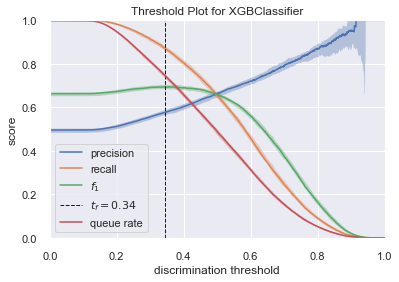

In [25]:

# instantiating the classification model and visualizer
visualizer = DiscriminationThreshold(xgb_gridsearch.best_estimator_)

visualizer.fit(X, y)        # fit data to the visualizer

# finalizing and save the figure to disk
visualizer.show(outpath='images/threshold-plot.png', transparent=False)

# viewing the figure
visualizer.show()

> Though we chose to focus on precision and accuracy metrics, other scores were closely aligned and responded similarly to algorythmic changes and hyperperameter adjustments.

## Save

> Our original dataset already is saved.
* We will also want to save our transformations and final model, for reproducibility.
* In addition, it would be advantageous to operationalize our feature selection pipeline.
* Finally, we can operationalize a model selection pipeline for use with future datasets. The pipeline should...
    - split the dataset
    - scale the data
    - accept a list of classifiers/estimators
    - accept a list of relevant parameters (or a default) for each classifer
    - accept a grid of parameters for tuning
    - include a grid search

## Notebook 02 Summary
> In this notebook:
* Plotted class balance and feature distribution
* Split the dataset for training and testing
* Built, executed, and compared multiple models
* Selected best features
* Perfomed a boosted grid search to optimize hyperperameters for our best model

### Save Data

In [26]:
# def save_pickle (self, filename):
#     with open(filename, 'wb') as f:
#         pickle.dump(self, f)

# def read_pickle (self, filename):
#     with open(filename, 'rb') as f:
#         rd = pickle.load(f)
#     return (rd)

# with open('data/modXy.pickle', 'wb') as f:
#     # pickling using the highest protocol available
#     pickle.dump(mod_X, f, pickle.HIGHEST_PROTOCOL)

# Project Summary

> This project realized the following results:
    * A final XGBoost model capable of predicting whether an article will earn at least 1500 shares
        - 67\% precision
        - 66\% accuracy
    * Identification of the following best predictors as determined through forward selection, using the mlxtend library's SequentialFeatureSelector module:
        - timedelta             Days between the article publication and
                                the dataset acquisition
        - n_unique_tokens       Rate of unique words in the content
        - n_non_stop_words      Rate of non-stop words in the content
        - channel_ent           Is data channel 'Entertainment'?
        - channel_socmed        Is data channel 'Social Media'?
        - channel_tech          Is data channel 'Tech'?
        - kw_avg_avg            Avg. keyword (avg. shares)
        - self_ref_min_shares   Min. shares of referenced articles in Mashable
        - self_ref_avg_shares   Avg. shares of referenced articles in Mashable
        - weekend               Was the article published on the weekend?
        - LDA_02                Closeness to LDA topic 2
        - LDA_03                Closeness to LDA topic 3

With these predictors and the final XGBoost model, the content provider can expect to be able to predict whether or not an article will reach the threshold of 1500 shares.

In [27]:
# 72 Char. screen - width reference
########################################################################